
## 신경망 첫 걸음

- matpoltlib.pyplot.imshow(배열, interpolation="nearest")를 통해 배열을 시각화할 수 있다.

- 신경망은 **초기화**(입력, 은닉, 출력 노드의 수 설정), **학습**(학습 데이터들을 통해 학습하고 이에 따라 가중치 업데이트), **질의**(입력을 받아 연산한 후 출력 노드에서 답을 전달) 기능을 가지고 있어야 한다. (3가지)

- 신경망의 객체에 매개변수를 노드의 수를 전달해야 다른 크기를 가지는 새로운 신경망도 그때그때 만들 수 있다. 학습률 또한 중요


### 1. 신경망 초기화

- 신경망의 가중 중요한 부분은 연결 노드의 가중치이다. 가중치는 전파 시 전달되는 신호와 역전파 시 오차를 계산하는 데 쓰이며, 이를 통해 신경망을 개선하는 역할을 수행. 가중치는 행렬로 간단하게 표현될 수 있다.
	- (은닉 노드 x 입력 노드)의 크기를 가지는 입력 계층과 은닉 계층 사이의 가중치 행렬
	-  (출력 노드 x 은닉 노드)의 크기를 가지는 은닉 계층과 출력 계층 사이의 가중치 행렬

#### 간단한 가중치 만들기 (-0.5 ~ 0.5 범위)
- self.wih = numpy.random.rand(self.hnodes, self.inodes) - 0.5
- self.who = numpy.random.rand(self.onodes, self.hnodes) - 0.5

#### 더 정교한 가중치 만들기
- self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
- self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

### 2. 신경망 질의

- query() 함수는 신경망으로 들어오는 입력을 받아 출력을 반환해준다. 단순한 작업이지만 이를 입력계층부터 은닉 계층을 거쳐 최종 출력 계층까지 수행해야한다는 점을 기억해야 다. 또한 신호는 은닉 노드와 출력 노드로 전달될 때 가중치 연산과 활서오하 함수 적용을 거친다는 점을 기억

- 행렬을 수식으로 표현: $X_{hidden}$ = $W_{input\_hidden}$ * I

- **hidden_inputs = numpy.dot(self.wih, inputs)**

<br/>

- 입력값과 가중치를 연산함으로써 은닉 계층의 각 노드로 들어오는 신호를 계산해냈다. 입력 계층이나 은닉 계층의 노드의 수가 달라지더라도 코드르르 다시 작성할 필요는 없다. 이게 행렬곱의 장점이다. 이제 은닉 계층으로부터 나오는 신호를 구하려면 시그모이드 함수를 적용하기만 하면된다.

- $O_{hidden} = sigmoid(X_{hidden})$

- 시그모이드 함수는 scipy라는 파이썬 라이브러리에 expit()이라는 이름으로 정의되어 있다.

```python
import scipy.special

self.activation_function = lambda x: scipy.special.expit(x)

hidden_outputs = self.activation_function(hidden_inputs)
```

- 지금까지의 코드 링크: [초기화 + 질의](https://github.com/pythonstrup/Data-Science/blob/main/week07/NeuralNetwork1.ipynb)

- query() 함수는 매개변수로 input_list만 받는다는 점을 기억해야함. 다른 값은 필요없다.

<br/>

### 3. 신경망 학습

- train() 함수는 두 단계가 있다. 첫 번째 단계는 query() 함수와 마찬가지로 출력 값을 계산해내는 단계이고, 두 번째 단계는 가중치가 어떻게 업데이트되어야 하는지 알려주기 위해 오차를 역전파하는 단계이다.

```python
def train(self, inputs_list, targets_list):
    # 입력리스트를 2차원 행렬로 변환
    inputs = numpy.array(inputs_list, ndmin=2).T
    targets = numpy.array(targets_list, ndmin=2).T

    # 은닉계층으로 들어오는 신호를 계산
    hidden_inputs = numpy.dot(self.wih, inputs)
    # 은닉계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)

    # 최종출력계층으로 들어오는 신호 계산
    final_inputs = numpy.dot(self.who, hidden_outputs)
    # 최종출력계층에서 들어오는 신호 계산
    final_outputs = self.activation_function(final_inputs)

    pass
```

- train() 함수의 매개변수는 필수 => 매개변수를 받은 함수를 numpy로 변환시켜준다.

- 오차는 학습 데이터에 의해 제공되는 실제 값과 우리가 계산한 결과 값 간의 차이로 정의된다. 결국 오차는 (실제 값 행렬 - 계산 값 행렬)이라는 연산의 결과 값이 된다. 이 연산은 원소 간(elementwise) 연산이다.

- **output_errors = targets - final_outputs** 로 구현할 수 있다. (오차는 실제 값 - 계산 값)

<br/>

- $error_{hidden}$ = $W^{T}_{hidden\_output}$ * $error_{output}$

- hidden_errors = numpy.dot(self.who.T, output_errors)

```python
# 출력 계층의 오차는 (실제값 - 계산값)
output_errors = targets - final_outputs

# 은닉계층과 출려계층 간의 가중치 업데이트
hidden_errors = numpy.dot(self.who.T, output_errors)
```

<br/><br/>

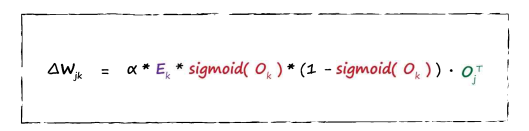

- 위 식을 코드로 나타내면 아래와 같다. 맨 앞에 학습률인 **self.lr**을 곱해줘야한다.
- numpy.transpose()는 전치행렬을 만들어주는 코드이다.

```python
# 은닉계층과 출력계층 간의 가중치 업데이트
self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

# 입력계층과 은닉계층 간의 가중치 업데이트
self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

```

<br/>

완성된 코드 보기: [완성된 코드](https://github.com/pythonstrup/Data-Science/blob/main/week07/NeuralNetwork1.ipynb)

### 4. MNIST 데이터 인식

- mnist 데이터는 6만 개의 학습데이터와 1만 개의 테스트 데이터로 구성된 데이터셋이다.

- csv파일 형태로된 데이터를 열면 각 행은 한 **레코드**라고 한다. 레코드에서 첫 번째 값은 레이블 Label이다. 그 이미지에 있는 숫자의 값을 나타내는데, 정답을 의미한다. 그 이후에 나오는 값은 쉽표로 구분되어 손으로 쓴 숫자의 픽셀값을 의미한다. 픽셀 배열의 크기는 28 x 28이므로 총 784개의 값이 존재한다.

<br/>

- 파일을 여는 방법은 아래와 같다.

```python
data_file = open("mnist_dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()  # 한 번에 한 행씩만 읽기
data_file.close() # 파일 닫아주기, 자원의 사용을 정리해줌
```

- 위에서 얻은 데이터를 imshow()를 이용해 시각화할 수도 있다.

```python
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation="None")
```

- numpy.asfarray()는 numpy 함수로서 문자열을 실수로 변환한 다음에 그 숫자로 구성된 배열을 생성한다.

### 5. MNIST 학습 데이터 준비하기

- 0 ~ 255 사이에 속하는 입력 색상 값들의 범위를 0.01 ~ 1.0 사이에 속하게 조정해야한다. 입력 값이 0을 가지면 가중치 업데이트를 없애버리므로 범위의 하한선은 0.01로 선택한다. 하지만 입력값이 1.0이 되는 것은 별문제가 되지 않으므로 상한선은 1.0이다.

- 0 ~ 255 사이에 속한 값을 255로 나누면 0 ~ 1의 범위를 가지게 된다. 여기에 0.99를 곱하면 0.0 ~ 0.99가 된다. 여기에 0.01을 더하면 원하는 범위값을 얻을 수 있다.

```python
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)
```

<br/>

- 다음은 타겟값 설정이다. 타겟은 0 ~ 9의 숫자로 이루어져있다. 만약 학습 데이터의 레이블이 5라면 0.01 ~ 0.99의 범위를 적용하여 배열을 만들면, 결과값은 [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01] 이 된다.

```python
onodes = 10  # 출력 계층의 노드 수는 10이다. 10개의 레이블을 가지고 있기 때문에
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99  # 레이블에 해당하는 인덱스에만 0.99의 가중치를 넣어준다.
```

<br/>

- MINST 코드 보기: [MNIST](https://github.com/pythonstrup/Data-Science/blob/main/week07/MNIST%EC%86%90%EA%B8%80%EC%94%A8.ipynb)

### 6. 개선하기

- 학습률에 따른 개선 (0.1 ~ 0.3의 학습률에서 좋은 성능을 보인다.)

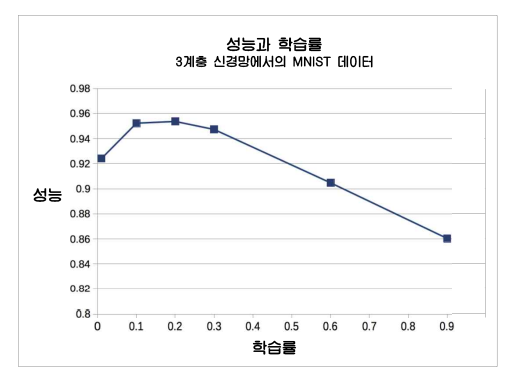

<br/>

- 여러 번 수행을 통한 개선 (epoch)

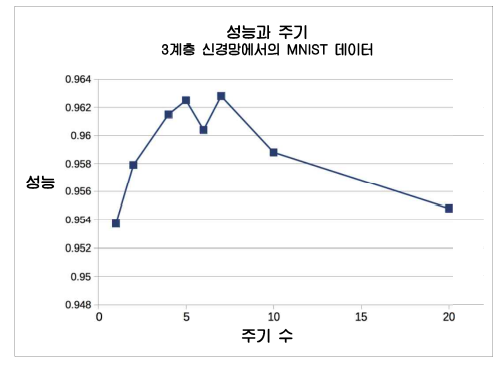

<br/>

- 학습률 + 주기

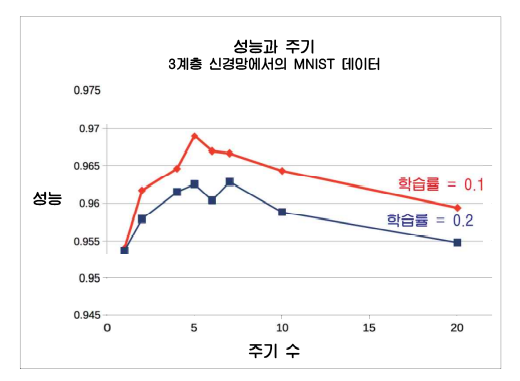

- 신경망의 구조 변경하기 (은닉노드 수의변경)

- 200개의 은닉 노드로는 0.9751 / 500개의 은닉 노드로는 0.9762의 정확도를 얻음

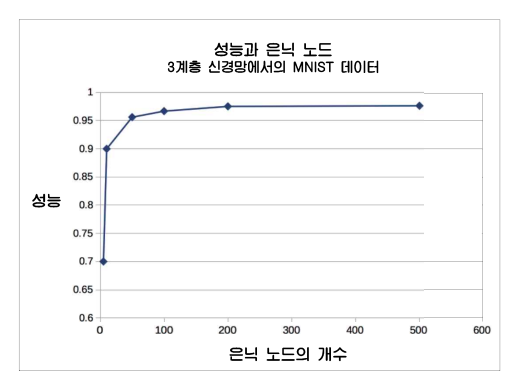

<br/>

- MINST 코드 보기: [MNIST](https://github.com/pythonstrup/Data-Science/blob/main/week07/MNIST%EC%86%90%EA%B8%80%EC%94%A8.ipynb)

### 7. 나만의 손글씨 데이터

- 파이썬 라이브러리를 사용하면 PNG 등 일반적인 포맷을 가지는 이미지 파일을 어렵지 않게 읽어와 디코딩할 수 있다.

```python
import scipy.misc
# flatten=True 매개변수는 이미지를 실수의 배열로 변환한다.
img_array = scipy.misc.imread(image_file_name, flatten=True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01 # 데이터의 범위를 <0.01 ~ 1.0>으로 조정
```

<br/>

- 아래와 같이 읽어올 수도 있다.

```python
import matplotlib.pyplot as plt
import imageio
import glob

test_image = []

for image_file_name in glob.glob("my_data/?my_own?.png"):
    correct_label=int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)
    
    plt.imshow(image_array, cmap="Reds", interpolation="None")
    plt.show()
    
    image_array = image_array[:, :, 0] # 컬러를 그레이 스케일로 변환
    
    # 28 x 28 행렬 값을 784개 값의 리스로 재구성
    image_data = 255.0 - image_array.reshape(784) 
    
    # 색상값 반전
    image_data = (image_data/ 255.0 * 0.99)
    
    plt.imshow(image_array, cmap="Reds", interpolation="None")
    plt.show()
    
    # test 배열에 삽입
    record = np.append(correct_label, image_data)
    test_image.append(record)
```

<br/><br/>

- 나만의 손글씨 코드 링크: [나만의 손글씨 인식](https://github.com/pythonstrup/Data-Science/blob/main/week08/NNLab3.ipynb)

<br/><br/>

### 8. 신경망의 마음속 들여다보기

#### 역질의

- 레이블을 출력노드에 집어 넣고 이 신호를 이미 학습된 신경망에 거꾸로 전파시켜 입력 노드에서 이미지를 출력하게 하는 것이다. 아래 그림은 일반적인 질의와 역질의의 개년을 비교해 표현한 것이다.

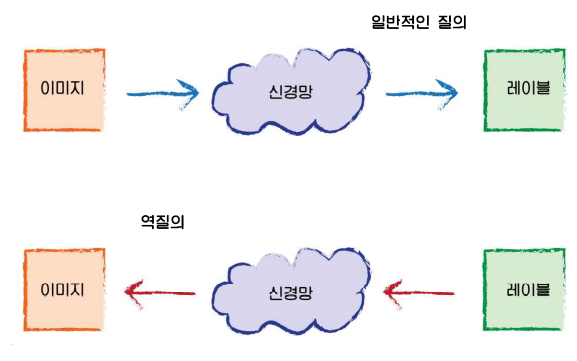

<br/>

- 순방향의 활성함수가 y = f(x) 라면, 역방향의 활성화는 x = g(y)일 것이다.

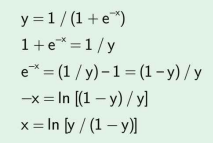

- 위의 함수를 로지트 함수(logit function)이라고 한다. 
- 파이썬의 scipy.special.expit()은 시그모이드
- scipy.special.logit() 함수는 로지트 함수의 기능을 제공한다. 역방향의 활성화함수는 로지트 함수를 사용한다.

<br/><br/>

### 9. 회전을 통해 새로운 학습데이터 만들기

- 10도와 -10도의 회전각을 적용해 데이터 증강을 할 수 있다.

- **ndimage.interpolation.rotate()** 함수가 이를 도와줄 것이다.

```python
import scipy.ndimage

# 반시계 방향으로 10도 회전
inputs_plus10_img = scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28), 10, cval=0.01, reshape=False)

# 시계 방향으로 10도 회전
inputs_minus10_img = scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28), -10, cval=0.01, reshape=False)
```

- cval은 입력 값으로 0이 들어가는 것을 방지해준다.

<br/>

#### 학습 시작

- 신중한 학습을 위해 0.01로 학습률을 낮춰준다.

- 회전각이 너무 커지면 성능이 오히려 떨어진다. 10도가 딱 적절한 각도이다.

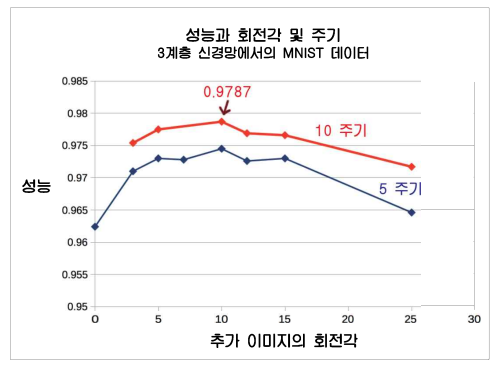

## 파이토치 첫 걸음

### 1. 딥러닝에 대하여

- 인공지능 문제들을 푸는 방법 중 하나로 머신러닝이라는 접근 방식이 있었고, 머신러닝적 접근 중 한 가지로 딥러닝이 있다고 이해

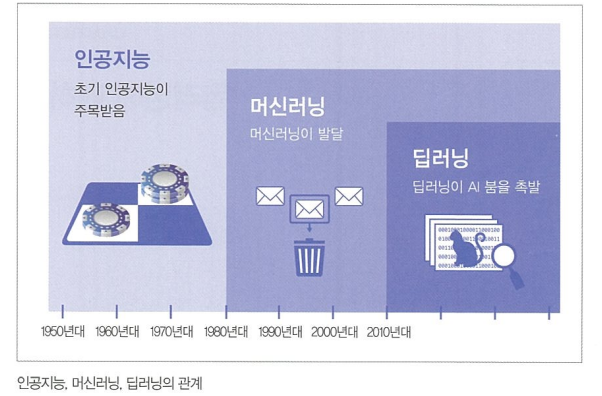

- 인공지능이란 기계가 인간의 인지 과정을 모방하는 것을 의미

- 인지 과정의 예시로는 학습과 문제해결이 있다.

- 머신러닝은 명시적으로 프로그래밍되지 않은 상태에서 기계에서 학습할 능력을 부여하는 것을 의미, 데이터와 결괏값이 주어지면 함수의 각 변수가 데이터에 의해 학습되어 스스로 적합한 값을 찾는다.

<br/>

- 머신러닝 알고리즘에는 서포트 벡터 머신, k-최근접 이웃 알고리즘, 결정 트리, 인공 신경망 등 다양한 방법이 있다. 딥러닝에서 사용되는 ‘심층 신경망’은 이 중 인공 신경망에 속함

- 심층 신경망이란 인공 신경망에서 은닉층의 개수가 1개 이상인 네트워크를 의미, 머신러닝의 주요한 부야인 지도학습, 비지도학습, 강화학습에 모두 사용되고 있음

- **지도학습**이란 데이터와 각각에 해당하는 정답 쌍이 존재할 때 데이터와 정답 간의 상관관계를 모델링하는 방식, 누군가 미리 구분해놓은 어떤 패턴을 기계가 배우는 방식임

- **비지도학습**이란 데이터만 있고 정답이 존재하지 않는 상황에서 데이터에 숨겨진 특정 패턴을 찾는 과정이라고 할 수 있음 (ex-군집화 알고리즘)

- **강화학습**은 특정 환경에서 어떤 행동을 했을 때 결과로 얻어지는 보상을 통해 학습하는 알고리즘으로 최종 보상을 극대화하도록 학습하는 방법

- 사물 인식을 기반으로, 물체를 구분하고 위치와 경계선을 구할 수 있다. 시야에 들어오는 물체들을 인식하고 어떤 행동을 해야 할지 결정을 내릴 수도 있고 물체들의 이동 패턴을 배울 수도 있다.이미지와 언어를 결합아여 하나의 장면을 글로 묘사하는 일을 이미지 캡셔닝(image captioning)이라고 한다.

<br/><br/>

### 2. 파이토치

- 파이토치는 2017년 초에 공개된 딥러닝 프레임워크로 개발자들과 연구자들이 쉽게 GPU를 활용하여 인공 신경망 모델을 만들고 학습시킬 수 있게 도와준다. 파이토치의 전신인 토치Torch는 루아 프로그래밍 언어로 되어있다.

- CUDA는 엔비디아가 GPU를 통한 연산을 가능하게 만든 API 모델이며, cuDNN은 CUDA를 이용해 딥러닝 연산을 가속해주는 라이브러리이다.

- 파이토치는 텐서플로와 마찬가지로 연산에 GPU를 사용하는 프레임워크이다. 하지만 텐서플로는 연산 그래프를 먼저 만들고 실제 연산할 때 값을 전달하여 결과를 얻는 ‘Define and Run’방식이고 파이토치는 그래프를 만듦과 동시에 값이 할당되는 ‘Define by Run’ 방식이므로 연산 그래프와 연산을 분리해서 생각할 필요가 없다. 또한 연산 속도에서도 차이가 있다. 연산 그래프를 고정해놓고 값만 전달하는 텐서플로가 더 빠른 환경도 있을 수 있겠지만, 텐서플로 깃허브에 올라온 이슈에 따르면 실험에 많이 사용되는 모델로 벤치마킹한 결과 파이토치가 텐서플로보다 2.5배 빠른 결과가 나왔다고 한다. 사용한 함수마다 차이는 있겠지만 파이토치는 전반적으로 속도면에서 텐서플로보다 빠르거나, 적어도 밀리지 않는다.

<br/><br/>

### 3. 선형회귀

- 선형회귀분석은 간단히 설명하면 주어진 데이터를 가장 잘 표현하는 직선 하나를 찾는 것이라고 할 수 있다.(가장 잘 표현한다는 말에는 비교가 가능하다는 뜻이 깔려있다.) 하나의 독립변수에 대하여 선형회귀분석을 하면 단순선형회귀(simple linear regression)라고 하고 독립변수가 여러 개인 경우에는 다중선형회귀(multivariate linear regression)라고 한다.

- 단순선형회귀는 y = w*x + b 형식의 직선방정식이다. w=가중치, b(bias)=편차

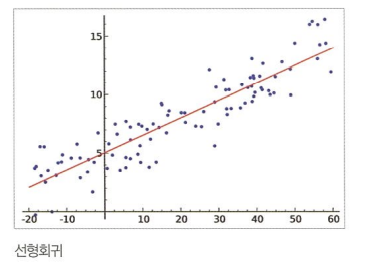

<br/>

- 어떤 w. b쌍에 대해서 테이터와 얼마나 잘 맞는지 수치적으로 계산을 할 수 있어야 하는데, 이때 사용되는 척도 중 대표적인 것으로 평균제곱오차(MSE)가 있다. n개의 예측값 yhat이 있고 주어진 데이터 값을 y라고 할 때, 식은 아래와 같다.

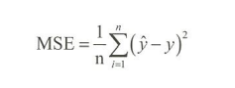

- 예측한 값과 실제 데이터 값과의 차이를 제곱하여 평균을 낸다는 것이다. yhat은 w와 b에 의해서 정해지기 때문에 w. b쌍을 비교하는 것이 가능해진다.

- 비교가 가능해졌기 때문에 이제 목표는 지정한 척도인 평균제곱오차를 최소화하는 W, b를 찾는 문제가 된다.

- 무작위로 W와 b를 뽑아서 그 중 오차가 가장 작은 것을 고를 수도 있겠지만 이는 모든 범위에서 찾아야 하기 때문에 비효율적이고, 올바른 방법이 아니다.

- 오차는 예측값과 목푯값의 차이이며, 이를 나타내는 것이 손실함수(loss function: 또는 비용함수 cost function)이다. MSE를 손실함수(= L2 손실: L2 loss)로 사용했을 때, 변수 w에 대한 오차는 아래와 같다.

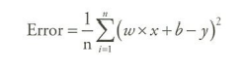

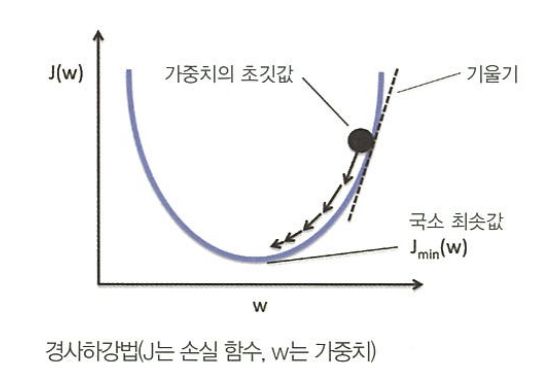

- 대부분의 딥러닝 모델에서는 경사하강법(gradient descent)이라는 방법을 사용한다. 여기서 경사란 기울기(gradient)로 미분값을 의미하고, 미분값이라는 것은 순간적인 기울기를 의미한다. 주어진 w에서 경사를 구하고 이를 통해 지속적으로 w를 업데이트함으로써 오차의 극소값을 찾을 수 있는데, 식으로 표현하면 아래와 같다.

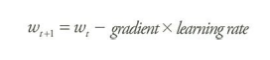

- 위에서 learning rate는 학습률로 변수인 w를 얼마만큼 업데이트할지 결정하는 수치이다.

<br/>

- 

### 4. 인공 신경망

- 생물학적 신경망은 여러 지극이 가지돌기dendrite들을 통해 신경세포로 들어오고 어느 정도 이상의 자극이 들어오면 이를 축삭axon을 통해 다른 세포로 전달하는 구조이다.

- 인공 신경망은 그림처럼 여러 개의 입력값과 출력값을 가질 수 있으며 입력 단과 출력 단 사이의 은닉층hidden layer의 수에 따라 신경망과 심층 신경망(deep neural network)으로 나뉜다.

- 심층 신경망은 2개 이상의 은닉층을 가진 인공 신경망을 의미한다.

- 하나의 셀(뉴런)에서와 마찬가지로 입력값들의 가중치 합을 활성화 함수에 통과시켜 변형시키고, 이 과정을 반복적으로 진행하여 최종 결괏값을 낸다.

<br/>

#### 인공 신경망의 요소

- y = (w * x) + b 형태가 반복된다.

- 수식대로 하면 입력값인 x의 열 단위로 데이터가 구분되게 되므로 x와 w의 위치를 바꿔서 x의 행 단위로 데이터를 구분하여 비중을 곱하고 편차를 더하기 위해서 이다.

- 계산된 값들은 시그모이드나 하이퍼볼릭탄젠트, 렐루 같은 활성화 함수(activation function)을 거쳐 비선성(nonlinearity)를 띠게 된다.

- 활성화 함수가 없다면 은닉층이 몇 개더라도 결국 선형 변환이기 때문에 깊은 모델을 만드는 의미가 사라지게 된다.

- 활성 함수의 종류는 아래와 같다.

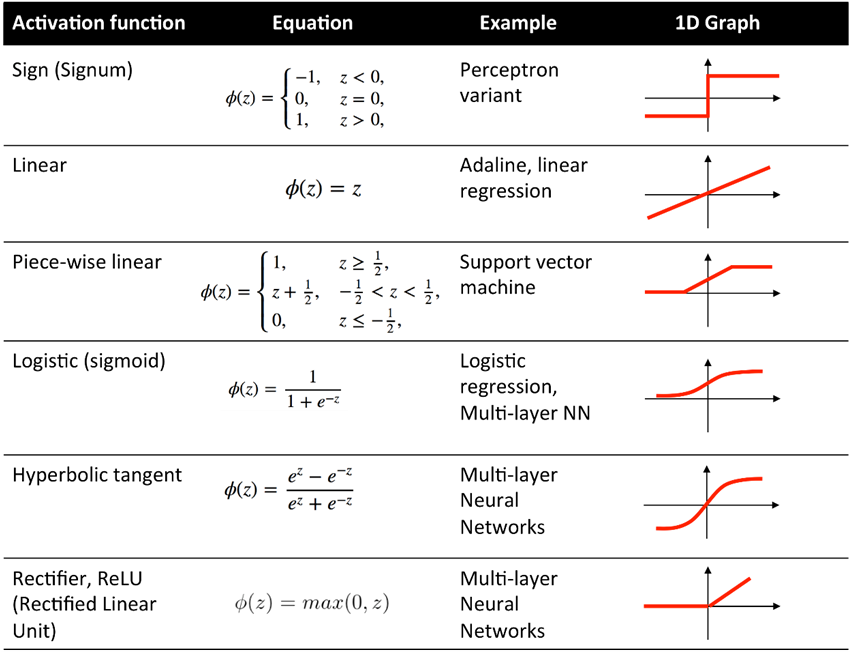

<br/>

#### 전파와 역전파

- 순전파forward propagation는 인공 신경망에 입력값이 들어와서 여러 개의 은닉층을 순서대로 거쳐 결괏값을 내는 과정이다.

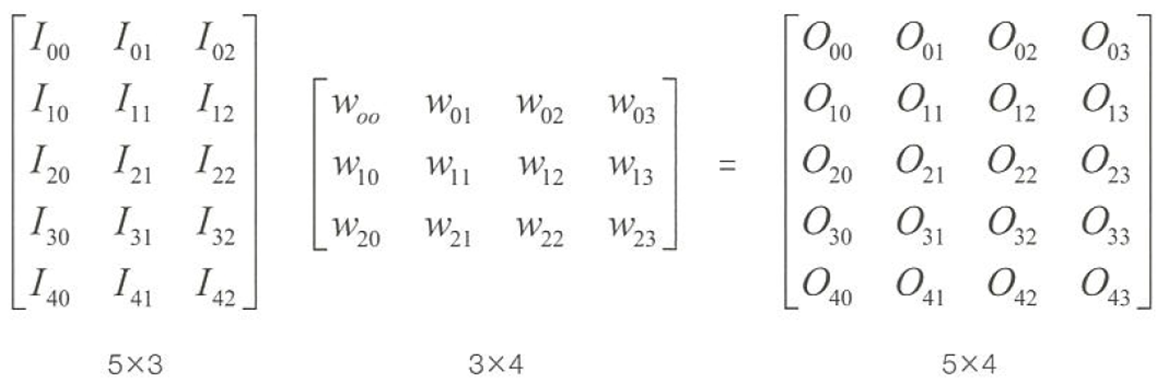
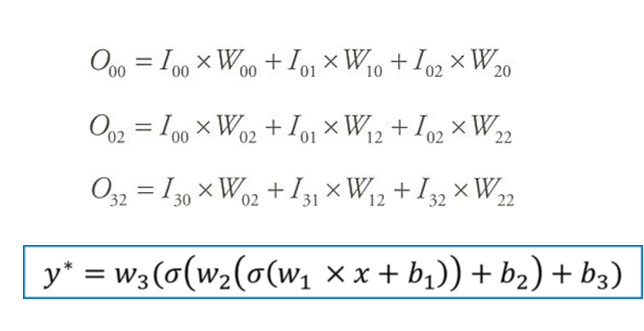

- 예측값인 y* 를 구하는 과정이 바로 전파이다.

<br/>

- 손실을 계산하고 경사 하강법gradient descent을 쓰기 위해 가중치와 편차에 대해 손실을 미분해보면 아래와 같다.

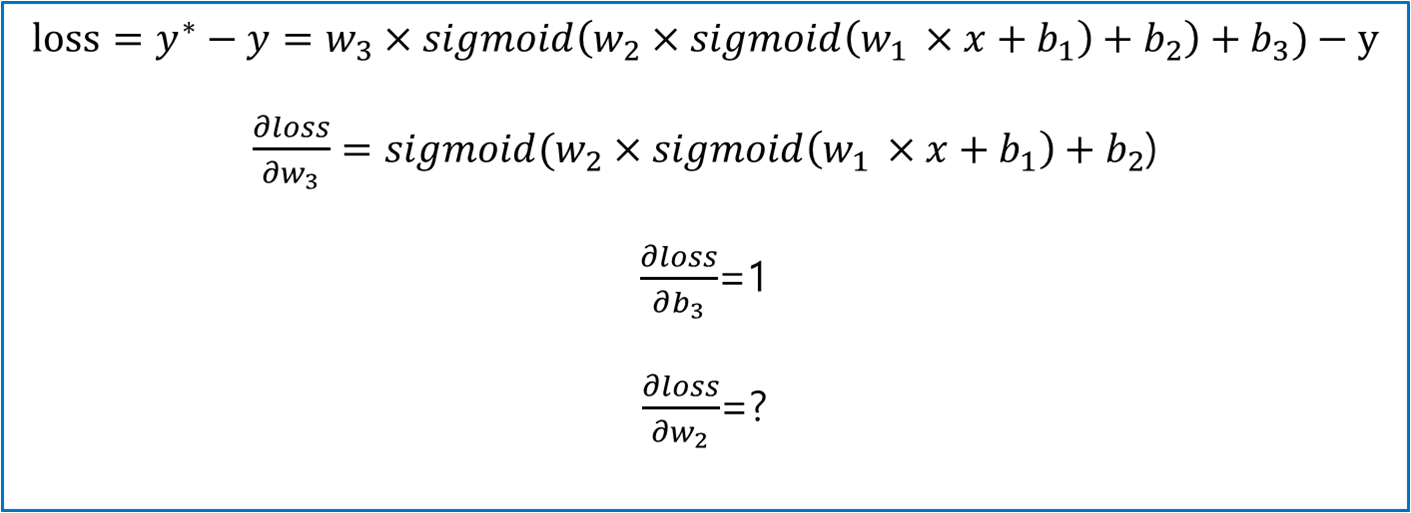
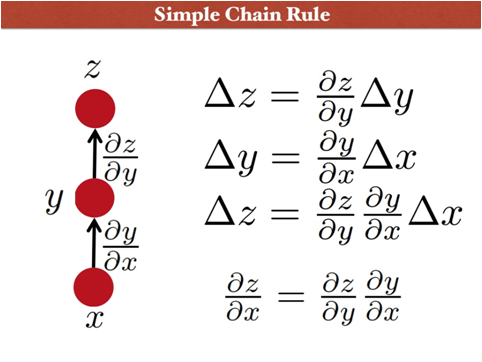

- w3와 b3는 바로 미분 가능하고, w2는 바로 미분할 수 없으므로, 연쇄법칙(chain rule)을 이용해 해결한다.

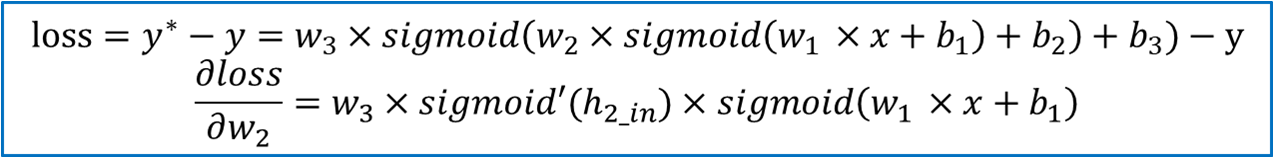

<br/>

#### 모델 구현

코드 링크: [x^2 + 3 구현](https://github.com/pythonstrup/Data-Science/blob/main/week10/TorchLab4.ipynb)

<br/>